## Telecom Churn Analysis: Graded Assignment group case study using PCA

1. Group Mates: Kiran Khairnar (Group Facilitator) and Venki Ramachandran
2. Due Date of Submission: 31-May-2021

#### Problem Statement:

In the highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important.

To reduce customer churn, telecom companies need to predict which **customers are at high risk of churn**.

#### Understanding and Defining Churn

There are two main models of payment in the telecom industry:
1. postpaid (customers pay a monthly/annual bill after using the services) and 
2. prepaid (customers pay/recharge with a certain amount in advance and then use the services)

churn prediction is usually more critical (and non-trivial) for **prepaid customers**, and the term ‘churn’ should be defined carefully. It is also the predominant way of using telecom services in Asia.

1. Revenue-based churn: Customers who have not utilized any revenue-generating facilities. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’
2. Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period

In this project, you will use the **usage-based definition** to define churn.

Below are the high-level steps will be followed. 
1. **Data Understanding**
2. **Data visualization and analysis(univariate/bivariate/multivariate) **
3. **Data cleaning & Preparation**
4. **Model Building & Evaluation**
5. **Conclusion**

# Importing and Merging Data

In [1]:
# Importing Pandas and NumPy
import missingno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import plot_roc_curve
from datetime import datetime
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression
from collections import Counter
from scipy import stats
#Supress warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Importing all datasets
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 226)
churn = pd.read_csv("telecom_churn_data.csv")

# I. Data Understanding

##### Let's understand the structure of our dataframe

In [3]:
# Check the dimensionality of dataset. How many records? How many features? etc.
churn.shape

(99999, 226)

In [4]:
#Let's see few rows from dataset what kind of values they have etc. 
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
#Overview for the outliers’ presence in data and scale of data etc.
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
churn.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [7]:
#Check feature data types.
churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [8]:
churn.isnull().sum().sort_values(ascending=False)

count_rech_2g_6             74846
date_of_last_rech_data_6    74846
count_rech_3g_6             74846
av_rech_amt_data_6          74846
max_rech_data_6             74846
                            ...  
last_day_rch_amt_6              0
last_day_rch_amt_7              0
last_day_rch_amt_8              0
last_day_rch_amt_9              0
mobile_number                   0
Length: 226, dtype: int64

###### From above output we can see maximum null values are in the month of June (6)
###### We have 226 columns, that is quite a lot, let. us see what they are

In [9]:
# find ones that have _rech_ substring in them. "rech" stands for recharge as per the data dictionary.
churn.columns[churn.columns.str.contains("_rech_")].values

array(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'], dtype=object)

###### Derive month wise new features for total recharge amount. 

In [10]:
# Calculate total recharge amount for each customer in a month.
# Add data and call recharge amount to get total amount for the month
# for month 6
churn['total_rech_amt_data_6'] = churn['total_rech_data_6'] * churn['av_rech_amt_data_6'] 
churn['total_amt_6'] = churn['total_rech_amt_data_6'] + churn['total_rech_amt_6']
# for month 7
churn['total_rech_amt_data_7'] = churn['total_rech_data_7'] * churn['av_rech_amt_data_7']
churn['total_amt_7'] = churn['total_rech_amt_data_7'] + churn['total_rech_amt_7']
# for month 8
churn['total_rech_amt_data_8'] = churn['total_rech_data_8'] * churn['av_rech_amt_data_8']
churn['total_amt_8'] = churn['total_rech_amt_data_8'] + churn['total_rech_amt_8']
# for month 9
churn['total_rech_amt_data_9'] = churn['total_rech_data_9'] * churn['av_rech_amt_data_9']
churn['total_amt_9'] = churn['total_rech_amt_data_9'] + churn['total_rech_amt_9']
# if any of these columns are null, update to 0
churn[['total_amt_6', 'total_amt_7','total_amt_8', 'total_amt_9']] = churn[['total_amt_6', 'total_amt_7','total_amt_8', 'total_amt_9']].fillna(value=0)

In [11]:
# Verify if the new columns created. 
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,...,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_amt_6,total_rech_amt_data_7,total_amt_7,total_rech_amt_data_8,total_amt_8,total_rech_amt_data_9,total_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,...,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,2

In [12]:
# Lets check average revenue distribution for the month Jun, Jul & Aug
churn[["arpu_6", "arpu_7", "arpu_8"]].describe()

,arpu_6,arpu_7,arpu_8
count,99999.000000,99999.000000,99999.000000
mean,282.987358,278.536648,279.154731
std,328.439770,338.156291,344.474791
min,-2258.709000,-2014.045000,-945.808000
25%,93.411500,86.980500,84.126000
50%,197.704000,191.640000,192.080000
75%,371.060000,365.344500,369.370500
max,27731.088000,35145.834000,33543.624000


###### Lets check circle wise customer distribution

In [13]:
churn['circle_id'].isnull().sum()

0

In [14]:
churn['circle_id'].value_counts()

109    99999
Name: circle_id, dtype: int64

From above output we can see that "circle_id" has same value in every record i.e circle_id = 109

###### We need to create target variable "churn" for the prediction of customer who is likely going to churn. We will be using below columns to decide on that. Let’s check what values these columns have.
1. total_ic_mou_9 - incoming calls minutes of usage
2. total_og_mou_9 - outgoing calls minutes of usage
3. vol_2g_mb_9 - Mobile internet usage volume (in MB) 2G network
4. vol_3g_mb_9 - Mobile internet usage volume (in MB) 3G network

In [15]:
churn['total_ic_mou_9'].value_counts()

0.00       11485
0.25          28
0.26          24
0.28          23
0.53          22
           ...  
396.74         1
333.53         1
283.84         1
5861.24        1
419.54         1
Name: total_ic_mou_9, Length: 31260, dtype: int64

In [16]:
churn['total_og_mou_9'].value_counts()

0.00       14143
0.21          81
0.20          49
0.43          35
1.01          33
           ...  
954.74         1
101.61         1
2041.63        1
1419.18        1
778.66         1
Name: total_og_mou_9, Length: 39160, dtype: int64

In [17]:
churn['vol_2g_mb_9'].value_counts()

0.00      78279
0.01        122
0.02         82
0.03         70
0.04         67
          ...  
58.79         1
255.44        1
49.35         1
98.94         1
214.43        1
Name: vol_2g_mb_9, Length: 13919, dtype: int64

In [18]:
churn['vol_3g_mb_9'].value_counts()

0.00       84638
0.01          18
0.04          17
0.02          16
0.03          14
           ...  
181.00         1
2113.99        1
847.12         1
785.98         1
583.60         1
Name: vol_3g_mb_9, Length: 14472, dtype: int64

###### Lets check how many features have null values

In [19]:
null_val_col = churn.isnull().sum()
null_val_col.iloc[null_val_col.values.nonzero()].index

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       ...
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'fb_user_9', 'total_rech_amt_data_6',
       'total_rech_amt_data_7', 'total_rech_amt_data_8',
       'total_rech_amt_data_9'],
      dtype='object', length=170)

<AxesSubplot:>

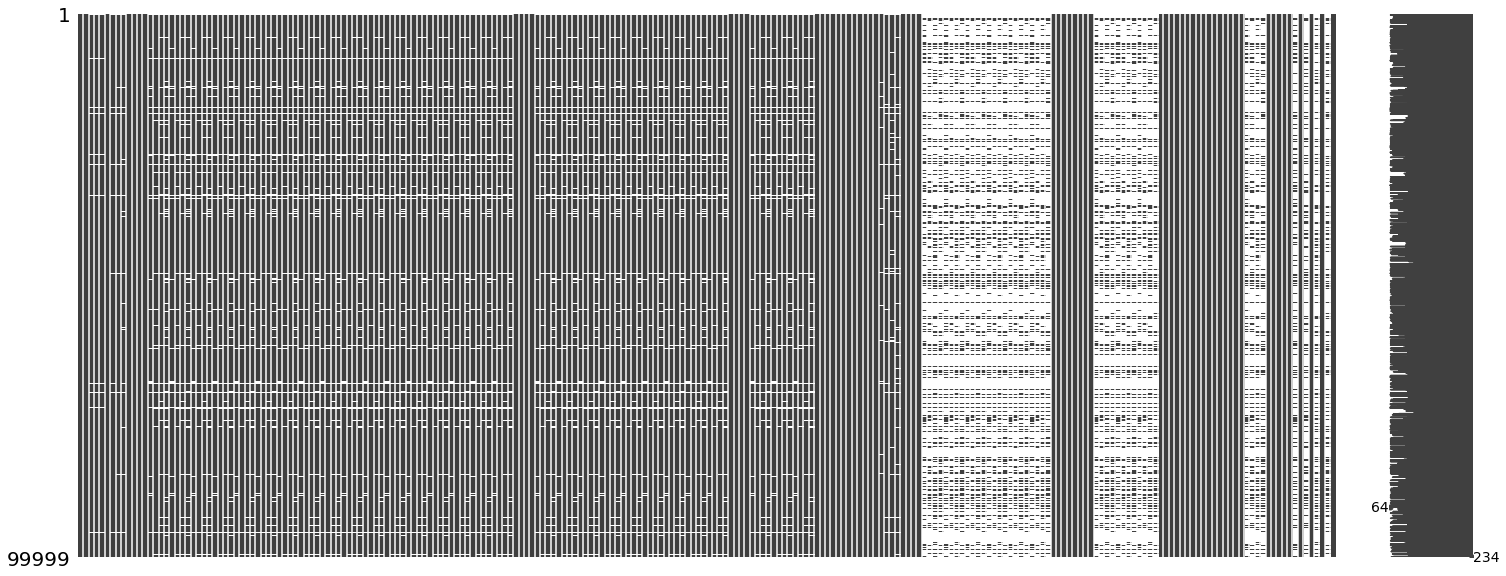

In [20]:
missingno.matrix(churn)

###### Lets check what values are ther in columns affix with "last_date_of_month_"

In [21]:
churn['last_date_of_month_6'].value_counts()

6/30/2014    99999
Name: last_date_of_month_6, dtype: int64

In [22]:
churn['last_date_of_month_7'].value_counts()

7/31/2014    99398
Name: last_date_of_month_7, dtype: int64

In [23]:
churn['last_date_of_month_8'].value_counts()

8/31/2014    98899
Name: last_date_of_month_8, dtype: int64

# II. Data visualization and analysis(univariate/bivariate/multivariate)

###### Lets check month wise average revenue distribution per user. 

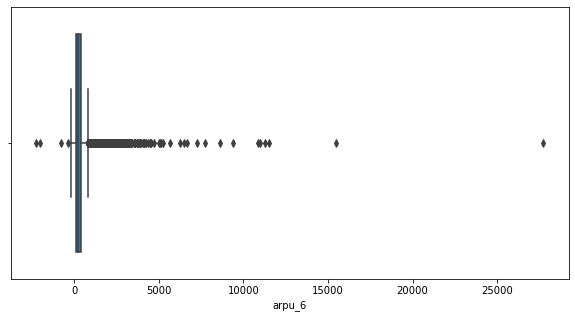

In [24]:
#Average revenue distribution for the month of Jun
plt.figure(figsize=(10,5))
sns.boxplot(churn["arpu_6"])
plt.show()

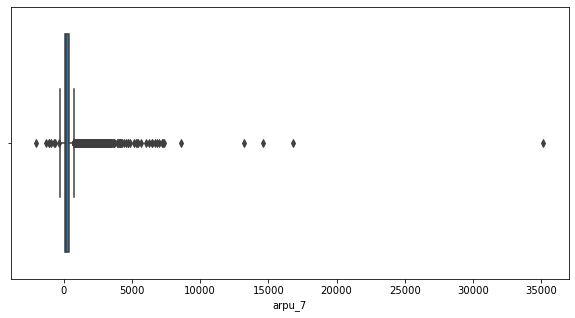

In [25]:
#Average revenue distribution for the month of Jul
plt.figure(figsize=(10,5))
sns.boxplot(churn["arpu_7"])
plt.show()

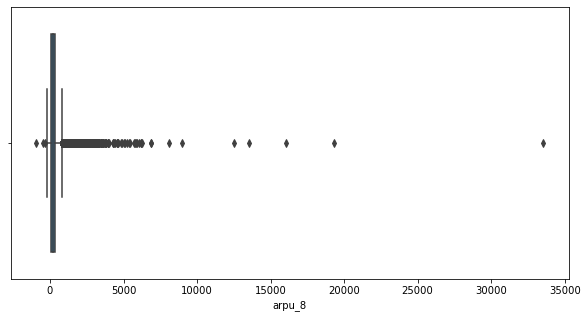

In [26]:
#Average revenue distribution for the month of Aug
plt.figure(figsize=(10,5))
sns.boxplot(churn["arpu_8"])
plt.show()

###### Lets check customer age on network - number of days the customer is using the operator T network

In [27]:
churn['aon'].describe()

count    99999.000000
mean      1219.854749
std        954.733842
min        180.000000
25%        467.000000
50%        863.000000
75%       1807.500000
max       4337.000000
Name: aon, dtype: float64

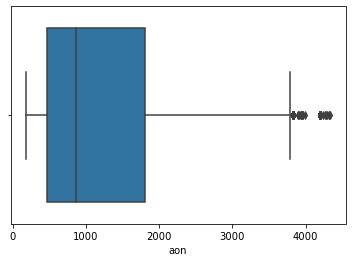

In [28]:
sns.boxplot(churn['aon'])
plt.show()

###### Lets check how Facebook or similar social app service users distributed in dataset. Also check if opting such service has any impact on data recharge amount. 

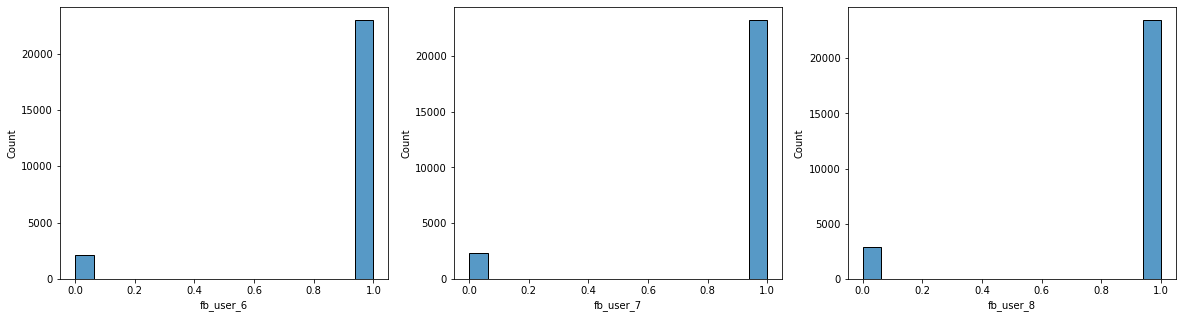

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(churn["fb_user_6"])
plt.subplot(1,3,2)
sns.histplot(churn["fb_user_7"])
plt.subplot(1,3,3)
sns.histplot(churn["fb_user_8"])
plt.show()

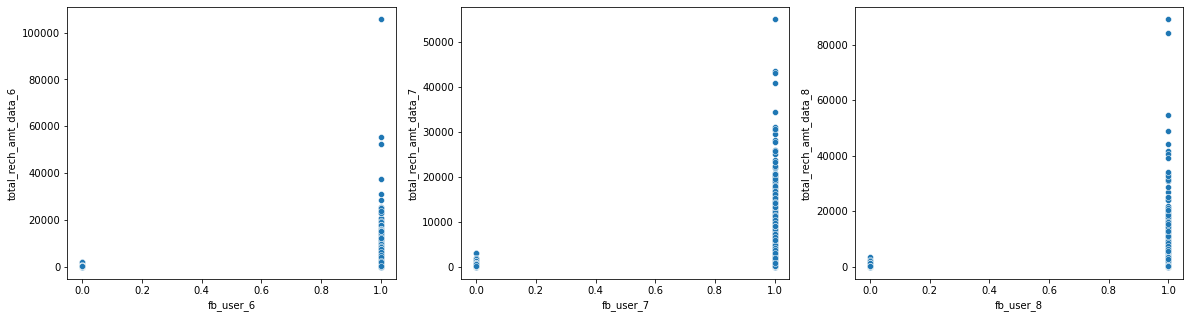

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(data=churn, x='fb_user_6', y = 'total_rech_amt_data_6')
plt.subplot(1,3,2)
sns.scatterplot(data=churn, x='fb_user_7', y = 'total_rech_amt_data_7')
plt.subplot(1,3,3)
sns.scatterplot(data=churn, x='fb_user_8', y = 'total_rech_amt_data_8')
plt.show()

###### Lets check how night pack service users distributed in dataset. Also check if opting such service has any impact on recharge amount. 

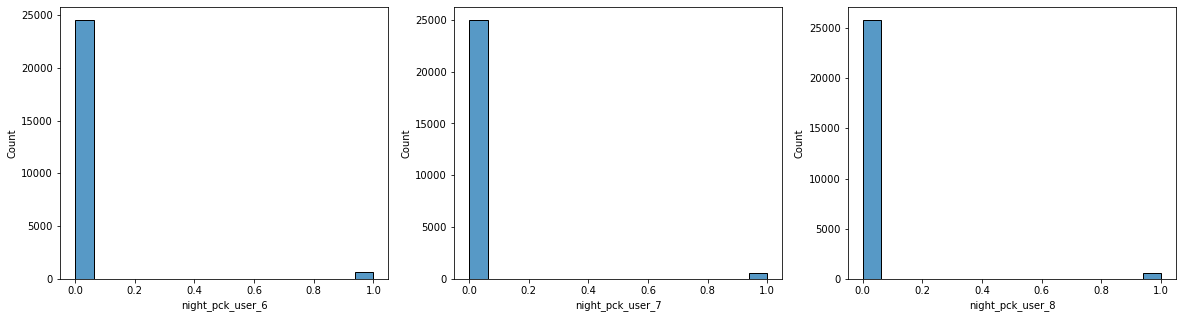

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(churn["night_pck_user_6"])
plt.subplot(1,3,2)
sns.histplot(churn["night_pck_user_7"])
plt.subplot(1,3,3)
sns.histplot(churn["night_pck_user_8"])
plt.show()

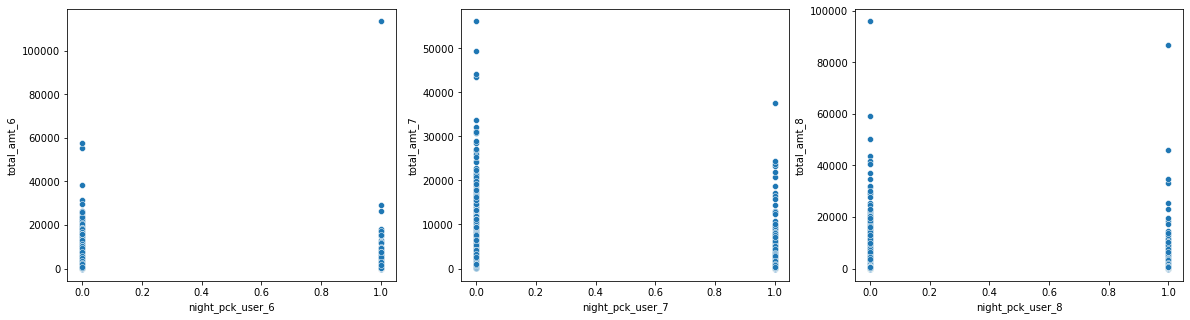

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(data=churn, x='night_pck_user_6', y = 'total_amt_6')
plt.subplot(1,3,2)
sns.scatterplot(data=churn, x='night_pck_user_7', y = 'total_amt_7')
plt.subplot(1,3,3)
sns.scatterplot(data=churn, x='night_pck_user_8', y = 'total_amt_8')
plt.show()

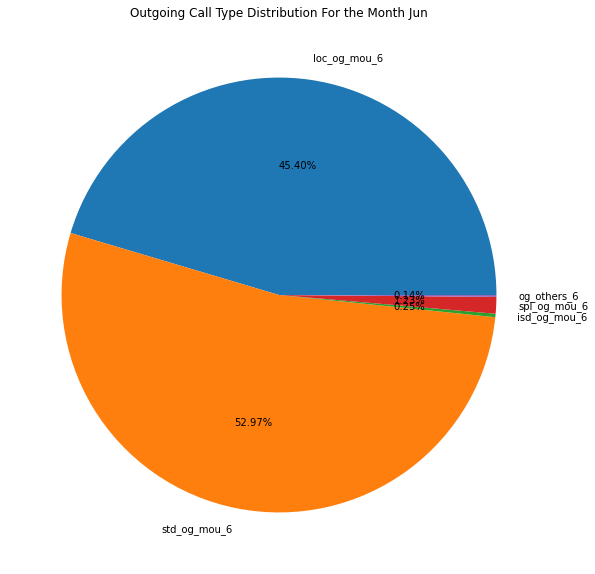

In [33]:
plt.figure(figsize=(10,10))
jun_call_type = churn[['loc_og_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6']].sum()
plt.pie(jun_call_type, labels=jun_call_type.index,autopct='%1.2f%%')
plt.title('Outgoing Call Type Distribution For the Month Jun')
plt.show()

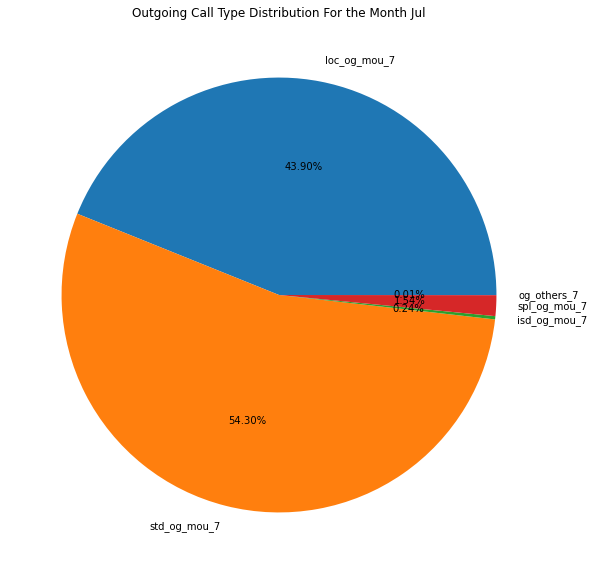

In [34]:
plt.figure(figsize=(10,10))
jun_call_type = churn[['loc_og_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7']].sum()
plt.pie(jun_call_type, labels=jun_call_type.index,autopct='%1.2f%%')
plt.title('Outgoing Call Type Distribution For the Month Jul')
plt.show()

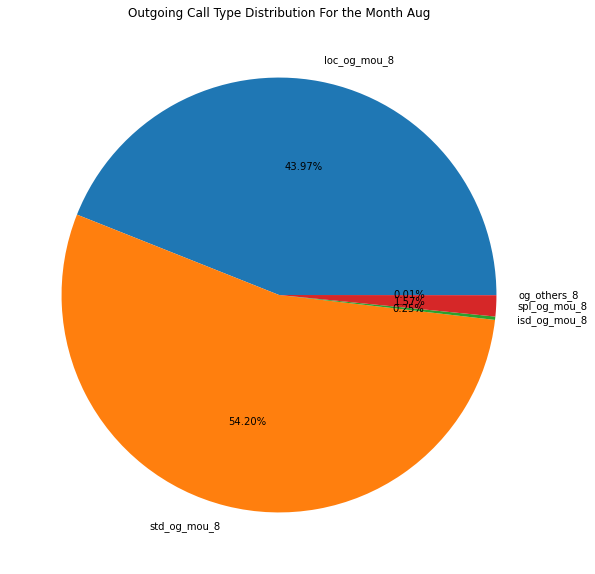

In [35]:
plt.figure(figsize=(10,10))
jun_call_type = churn[['loc_og_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8']].sum()
plt.pie(jun_call_type, labels=jun_call_type.index,autopct='%1.2f%%')
plt.title('Outgoing Call Type Distribution For the Month Aug')
plt.show()

###### Lets check month wise offnet vs onnet call volume
1. Offnet: All kind of calls outside the operator T network
2. Onnet: All kind of calls within the same operator network

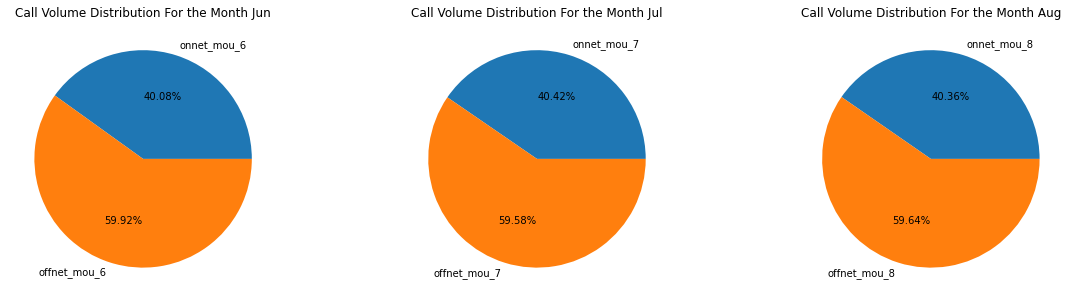

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
call_vol = churn[['onnet_mou_6','offnet_mou_6']].sum()
plt.pie(call_vol, labels=call_vol.index,autopct='%1.2f%%')
plt.title('Call Volume Distribution For the Month Jun')
plt.subplot(1,3,2)
call_vol = churn[['onnet_mou_7','offnet_mou_7']].sum()
plt.pie(call_vol, labels=call_vol.index,autopct='%1.2f%%')
plt.title('Call Volume Distribution For the Month Jul')
plt.subplot(1,3,3)
call_vol = churn[['onnet_mou_8','offnet_mou_8']].sum()
plt.pie(call_vol, labels=call_vol.index,autopct='%1.2f%%')
plt.title('Call Volume Distribution For the Month Aug')
plt.show()

###### Let’s check if users prefer to make STD outgoing calls in same network operator or outside etc.
1. T2T	Operator T to T, i.e. within same operator (mobile to mobile)
2. T2M  Operator T to other operator mobile
3. T2O  Operator T to other operator fixed line
4. T2F  Operator T to fixed lines of T
5. T2C  Operator T to it’s own call center

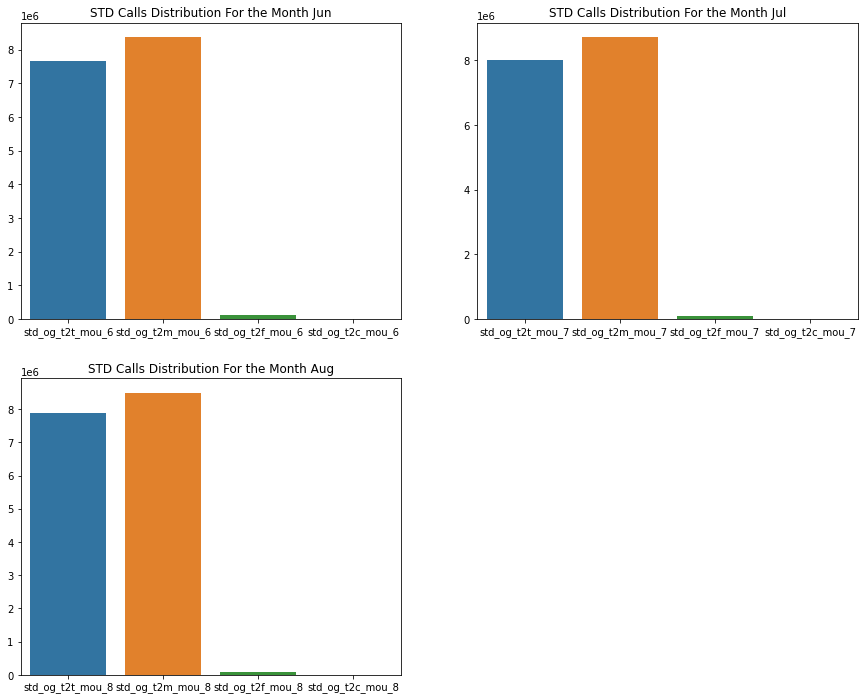

In [37]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
std_calls = churn[['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_t2c_mou_6']].sum()
sns.barplot(x=std_calls.index, y=std_calls.values)
plt.title('STD Calls Distribution For the Month Jun')
plt.subplot(2,2,2)
std_calls = churn[['std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_t2c_mou_7']].sum()
sns.barplot(x=std_calls.index, y=std_calls.values)
plt.title('STD Calls Distribution For the Month Jul')
plt.subplot(2,2,3)
std_calls = churn[['std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_t2c_mou_8']].sum()
sns.barplot(x=std_calls.index, y=std_calls.values)
plt.title('STD Calls Distribution For the Month Aug')
plt.show()

###### Let’s check if users prefer to make Local outgoing calls in same network operator or outside etc.
1. T2T	Operator T to T, i.e. within same operator (mobile to mobile)
2. T2M  Operator T to other operator mobile
3. T2O  Operator T to other operator fixed line
4. T2F  Operator T to fixed lines of T
5. T2C  Operator T to it’s own call center

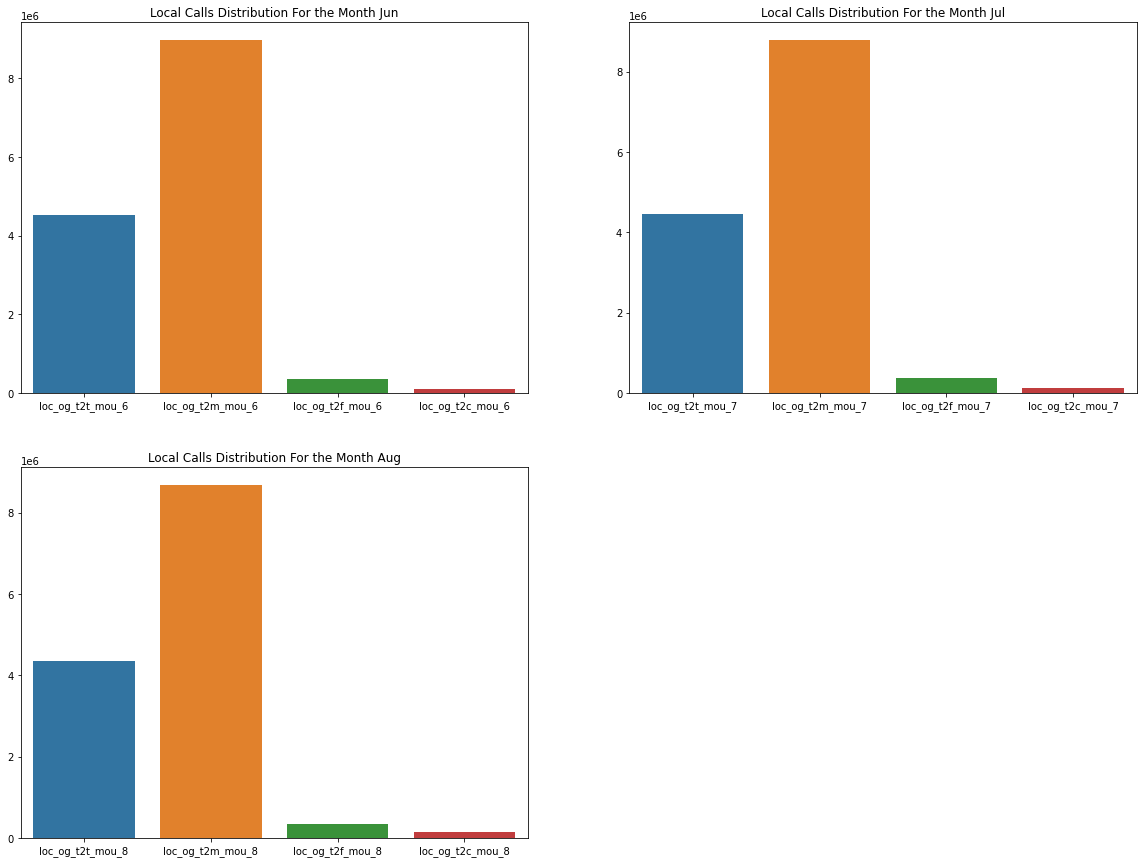

In [38]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
loc_calls = churn[['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6']].sum()
sns.barplot(x=loc_calls.index, y=loc_calls.values)
plt.title('Local Calls Distribution For the Month Jun')
plt.subplot(2,2,2)
loc_calls = churn[['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7']].sum()
sns.barplot(x=loc_calls.index, y=loc_calls.values)
plt.title('Local Calls Distribution For the Month Jul')
plt.subplot(2,2,3)
loc_calls = churn[['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8']].sum()
sns.barplot(x=loc_calls.index, y=loc_calls.values)
plt.title('Local Calls Distribution For the Month Aug')
plt.show()

###### Since month of Aug is action phase for the churning customers. Let’s analyze this month further down.

###### Let’s find out if any multicollinearity exists in the month 8 predictor variables

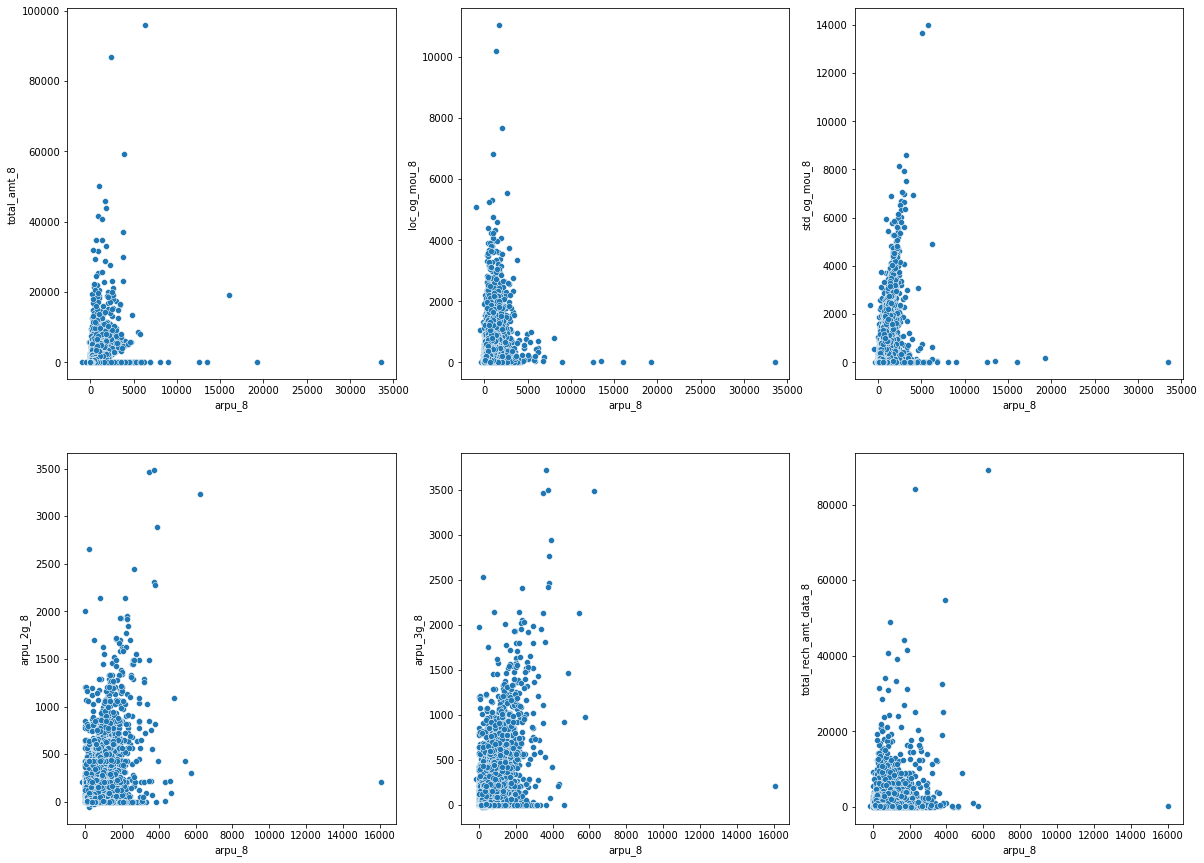

In [39]:
#Let's plot average revenue per user(arpu_8) vs total amount
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.scatterplot(data=churn, x='arpu_8', y = 'total_amt_8')
plt.subplot(2,3,2)
sns.scatterplot(data=churn, x='arpu_8', y = 'loc_og_mou_8')
plt.subplot(2,3,3)
sns.scatterplot(data=churn, x='arpu_8', y = 'std_og_mou_8')
plt.subplot(2,3,4)
sns.scatterplot(data=churn, x='arpu_8', y = 'arpu_2g_8')
plt.subplot(2,3,5)
sns.scatterplot(data=churn, x='arpu_8', y = 'arpu_3g_8')
plt.subplot(2,3,6)
sns.scatterplot(data=churn, x='arpu_8', y = 'total_rech_amt_data_8')
plt.show()

###### Below are some of the insights from data visualization and data understanding. 

1.	All the customers belong only one telecom circle which is id = 109.
2.	There are several features that have outliers in their data. 
3.	There over 100s of features which have missing values in it. 
4.	Most of the customers have average revenue under approximately 1000. 
5.	75% of customers are on T-Network since less than 2000 days. 
6.	50% of customers are on T-Network since less than 900 days.
7.	There are few customers(outliers) who are in T-Network more than 3500 days. 
8.	We see high data recharge from Facebook or similar social app service users. 
9.	We do not see any significant difference on recharge behavior on night pack customers. 
10.	Most of the outgoing call usage are either Local or ST calls. Very less minutes of usage on ISD outgoing calls.  
11.	Approximately 40% of minutes of usage is on ONNET and 60% on OFFNET. 
12.	Most of the STD outgoing calls minutes of usage on T2T - Operator T to T, i.e. within same operator (mobile to mobile).
13.	Most of the local outgoing call minutes of usage on T2M - Operator T to another operator mobile. 
14. The columns name affixed with "last_date_of_month_" are having same values in more than 90% of records.
15. Data usage high contributing factor in average revenue per user. 

# III. Data Cleaning & Preparation 

### Filter High Value Customers

1. Calculate total data recharge amount for months 6 (June) and 7(July)
2. Calculate total recharge amount for these two months

In [40]:
# Calcuate average recharge done in months 6 and 7
churn['av_rech_amt_6and7'] = (churn['total_amt_6'] + churn['total_amt_7']) / 2
churn['av_rech_amt_6and7'].describe(percentiles=[.7])

count    99999.000000
mean       279.283952
std        867.200548
min          0.000000
50%          0.000000
70%        121.800000
max      61236.000000
Name: av_rech_amt_6and7, dtype: float64

In [41]:
# Calculate 70th percentile value
percentile = round(churn['av_rech_amt_6and7'].quantile(0.7),2) # 70th percentile
percentile

121.8

In [42]:
# Identify HVC - high value customers where their spend amt is >= 70th percentile
churn['hvc']  =  (churn['av_rech_amt_6and7'] >= percentile).astype('int')
# How many hvc customers
round((churn['hvc'].value_counts(1)*100),2)

0    70.0
1    30.0
Name: hvc, dtype: float64

In [43]:
# create a new hvc df & drop the columns used for filtering High Value Customers as we do not need those columns later.
churn_hvc = churn[churn['hvc'] == 1]
churn_hvc = churn_hvc.drop(['av_rech_amt_6and7', 'hvc'], axis=1)
churn_hvc.shape

(30000, 234)

In [44]:
churn_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,...,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_amt_6,total_rech_amt_data_7,total_amt_7,total_rech_amt_data_8,total_amt_8,total_rech_amt_data_9,total_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,...,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,2

###### We got 30k HVC, the problem statement indicated that it should be around 29.9K, We got 100 more customers, probably ok

#### Assumptions:
1. Data set is only prepaid customers
2. ONLY Usage-based churn must be considered
3. We will use the data for the 9th month 'Sep' to create the 'churn target' variable

In [45]:
churn_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30000 non-null  float64
 1   total_og_mou_9  30000 non-null  float64
 2   vol_2g_mb_9     30000 non-null  float64
 3   vol_3g_mb_9     30000 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [46]:
churn_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,223.626414,293.936688,120.251171,403.420874
std,337.863853,498.306101,312.512927,962.957633
min,0.000000,0.000000,0.000000,0.000000
25%,31.305000,9.690000,0.000000,0.000000
50%,119.545000,110.435000,3.120000,0.000000
75%,280.987500,365.752500,84.410000,490.025000
max,10796.590000,11517.730000,8993.950000,39221.270000


In [47]:
# create Churn target variable
churn_hvc['target'] = ((churn_hvc['total_ic_mou_9']==0.0) & (churn_hvc['total_og_mou_9']==0.0) &
 (churn_hvc['vol_2g_mb_9']==0.0) & (churn_hvc['vol_3g_mb_9']==0.0)).astype(int)

In [48]:
churn_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','target']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,target
0,0.00,0.00,0.00,0.00,1
1,188.04,72.11,0.00,0.00,0
4,205.31,104.59,0.00,0.00,0
8,34.91,142.18,0.00,0.00,0
9,412.63,151.33,0.00,0.00,0
...,...,...,...,...,...
99986,547.11,1095.24,9.14,941.48,0
99988,265.84,182.16,0.05,393.34,0
99990,8.46,139.43,0.00,0.00,0
99997,2.21,0.00,85.67,4177.14,0


In [49]:
# Check the value counts
churn_hvc['target'].value_counts()

0    27459
1     2541
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

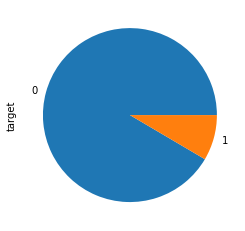

In [50]:
#Calculate churn percentage
(churn_hvc['target'].value_counts(1)*100).plot(kind='pie')

In [51]:
# Get percentage of churn
round((churn_hvc['target'].value_counts(1))*100, 2)

0    91.53
1     8.47
Name: target, dtype: float64

###### We have a highly imbalanced target variable in data because 91.53% of the customers are tagged not churn(value=0) and only ~8.47% are tagged churned(value=1)

In [52]:
churn_hvc.shape

(30000, 235)

###### Remove all the attributes corresponding to the churn phase (all attributes having ‘_9’, etc. in their names).

In [53]:
# Find the column names which "_9" suffix. 
del_cols = churn_hvc.columns[churn_hvc.columns.str.contains("_9")].values
del_cols

array(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9',
       'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9',
       'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9',
       'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9',
       'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_p

In [54]:
del_cols.shape

(56,)

###### Create the new data frame where all the columns suffixed with "_9" are removed. 
###### There are total 56 columns for the month of Sep (9). So, after dropping all these columns we will be left with 181 columns.

In [55]:
churn_hvc = churn_hvc.drop(del_cols, axis=1)
churn_hvc.shape

(30000, 179)

###### During data understanding step we found that columns ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'] has same value in all the records.

In [56]:
churn_hvc[['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']].isnull().sum()

last_date_of_month_6      0
last_date_of_month_7     48
last_date_of_month_8    219
dtype: int64

###### From above output we can see columns  ['date_of_last_rech_7', 'date_of_last_rech_8'] has some missing values we will impute these values with mode() from respective column.

In [57]:
churn_hvc['last_date_of_month_7'].fillna(churn_hvc['last_date_of_month_7'].mode().values[0], inplace = True)
churn_hvc['last_date_of_month_8'].fillna(churn_hvc['last_date_of_month_8'].mode().values[0], inplace = True)

In [58]:
# Lets verify few more date columns and missing values. 
churn_hvc[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']].isnull().sum()

date_of_last_rech_6    163
date_of_last_rech_7    205
date_of_last_rech_8    721
dtype: int64

In [59]:
print("Missing percentage column 'date_of_last_rech_6':", 
      churn_hvc['date_of_last_rech_6'].isnull().sum()*100/len(churn_hvc))
print("Missing percentage column 'date_of_last_rech_7':", 
      churn_hvc['date_of_last_rech_7'].isnull().sum()*100/len(churn_hvc))
print("Missing percentage column 'date_of_last_rech_8':", 
      churn_hvc['date_of_last_rech_8'].isnull().sum()*100/len(churn_hvc))

Missing percentage column 'date_of_last_rech_6': 0.5433333333333333
Missing percentage column 'date_of_last_rech_7': 0.6833333333333333
Missing percentage column 'date_of_last_rech_8': 2.4033333333333333


In [60]:
# Lets impute the missing values with the mode() as very less missing values
churn_hvc['date_of_last_rech_6'].fillna(churn_hvc['date_of_last_rech_6'].mode().values[0], inplace = True)
churn_hvc['date_of_last_rech_7'].fillna(churn_hvc['date_of_last_rech_7'].mode().values[0], inplace = True)
churn_hvc['date_of_last_rech_8'].fillna(churn_hvc['date_of_last_rech_8'].mode().values[0], inplace = True)

In [61]:
print("Missing percentage column 'date_of_last_rech_data_6':", 
      churn_hvc['date_of_last_rech_data_6'].isnull().sum()*100/len(churn_hvc))
print("Missing percentage column 'date_of_last_rech_data_7':", 
      churn_hvc['date_of_last_rech_data_7'].isnull().sum()*100/len(churn_hvc))
print("Missing percentage column 'date_of_last_rech_data_8':", 
      churn_hvc['date_of_last_rech_data_8'].isnull().sum()*100/len(churn_hvc))

Missing percentage column 'date_of_last_rech_data_6': 19.89
Missing percentage column 'date_of_last_rech_data_7': 18.6
Missing percentage column 'date_of_last_rech_data_8': 32.35333333333333


###### From above output we can see these columns have some missing values. We will impute these values with mode () from respective column.

In [62]:
churn_hvc['date_of_last_rech_data_6'].fillna(churn_hvc['date_of_last_rech_data_6'].mode().values[0], inplace = True)
churn_hvc['date_of_last_rech_data_7'].fillna(churn_hvc['date_of_last_rech_data_7'].mode().values[0], inplace = True)
churn_hvc['date_of_last_rech_data_8'].fillna(churn_hvc['date_of_last_rech_data_8'].mode().values[0], inplace = True)

In [63]:
# Find the column wise missing percentage. 
for i in churn_hvc.columns:
    col_null_percent = (float(churn_hvc[i].isnull().sum())/len(churn_hvc))
    if col_null_percent > 0.0:
        print("Column {} has percent missing = {}".format(i, round(col_null_percent,2)))

Column loc_og_t2o_mou has percent missing = 0.01
Column std_og_t2o_mou has percent missing = 0.01
Column loc_ic_t2o_mou has percent missing = 0.01
Column onnet_mou_6 has percent missing = 0.03
Column onnet_mou_7 has percent missing = 0.03
Column onnet_mou_8 has percent missing = 0.06
Column offnet_mou_6 has percent missing = 0.03
Column offnet_mou_7 has percent missing = 0.03
Column offnet_mou_8 has percent missing = 0.06
Column roam_ic_mou_6 has percent missing = 0.03
Column roam_ic_mou_7 has percent missing = 0.03
Column roam_ic_mou_8 has percent missing = 0.06
Column roam_og_mou_6 has percent missing = 0.03
Column roam_og_mou_7 has percent missing = 0.03
Column roam_og_mou_8 has percent missing = 0.06
Column loc_og_t2t_mou_6 has percent missing = 0.03
Column loc_og_t2t_mou_7 has percent missing = 0.03
Column loc_og_t2t_mou_8 has percent missing = 0.06
Column loc_og_t2m_mou_6 has percent missing = 0.03
Column loc_og_t2m_mou_7 has percent missing = 0.03
Column loc_og_t2m_mou_8 has per

###### From the above output we can see there are many columns which have some missing values. We will impute such columns with appropriate metric value such as mean/median/mode.

In [64]:
impute_cols = churn_hvc.columns[churn_hvc.isnull().sum() > 0.0].values
impute_cols

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_o

In [65]:
impute_cols.shape

(120,)

Impute Zero(0) for everything else and for date put the mode value for that month

In [66]:
# Taking all the numerical columns
churn_hvc[impute_cols] = churn_hvc[impute_cols].fillna(0)
churn_hvc.columns[churn_hvc.isnull().sum() > 0].values

array([], dtype=object)

In [67]:
# Check missing values one more time column by column 
for i in churn_hvc.columns:
    churn_percent = round((float(churn_hvc[i].isnull().sum())/len(churn_hvc)),2)
    if churn_percent > 0.0:
        print("Column {} has percent missing = {}".format(i, churn_percent))

###### From above output we can see that there is no NULL or missing values in dataframe.

In [68]:
# Lets Check the dimension of data frame.
churn_hvc.shape

(30000, 179)

### Checking for Outliers

In [69]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
churn_hvc.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_amt_6,total_rech_amt_data_7,total_amt_7,total_rech_amt_data_8,total_amt_8,target
count,3.000000e+04,30000.0,30000.0,30000.0,30000.0,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0,30000.0,30000.0,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0,30000.0,30000.0,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000

From the distribution shown above, you can see that there are lot of outliers in our data. Set the threshold to 95% and drop all rows beyond that. We will drop them when we do the Logistic Regression for model interpretability.

In [70]:
churn_hvc.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'total_rech_amt_data_6',
       'total_amt_6', 'total_rech_amt_data_7', 'total_amt_7',
       'total_rech_amt_data_8', 'total_amt_8', 'target'],
      dtype='object', length=179)

In [71]:
# Convert the date columns into something meaningful
# Let us convert the date of reacharge in each month from the number of days since start of month
# for e.g num_days_rech_6 = date_rech_6 - 6/1/2014 (start of the month)
date_cols = churn_hvc.columns[churn_hvc.columns.str.contains("date")].values
date_cols

array(['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'], dtype=object)

In [72]:
# Lets check the data type for the date columns
churn_hvc[churn_hvc.columns[churn_hvc.columns.str.contains("date")]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 99998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   last_date_of_month_6      30000 non-null  object
 1   last_date_of_month_7      30000 non-null  object
 2   last_date_of_month_8      30000 non-null  object
 3   date_of_last_rech_6       30000 non-null  object
 4   date_of_last_rech_7       30000 non-null  object
 5   date_of_last_rech_8       30000 non-null  object
 6   date_of_last_rech_data_6  30000 non-null  object
 7   date_of_last_rech_data_7  30000 non-null  object
 8   date_of_last_rech_data_8  30000 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB


In [73]:
#As you see above output that all these date columns are of type object. We will get them converted to datetime data types. 
churn_hvc['last_date_of_month_6'] = pd.to_datetime(churn_hvc['last_date_of_month_6'], format='%m/%d/%Y')
churn_hvc['last_date_of_month_7'] = pd.to_datetime(churn_hvc['last_date_of_month_7'], format='%m/%d/%Y')
churn_hvc['last_date_of_month_8'] = pd.to_datetime(churn_hvc['last_date_of_month_8'], format='%m/%d/%Y')

churn_hvc['date_of_last_rech_6'] = pd.to_datetime(churn_hvc['date_of_last_rech_6'], format='%m/%d/%Y')
churn_hvc['date_of_last_rech_7'] = pd.to_datetime(churn_hvc['date_of_last_rech_7'], format='%m/%d/%Y')
churn_hvc['date_of_last_rech_8'] = pd.to_datetime(churn_hvc['date_of_last_rech_8'], format='%m/%d/%Y')

churn_hvc['date_of_last_rech_data_6'] = pd.to_datetime(churn_hvc['date_of_last_rech_data_6'], format='%m/%d/%Y')
churn_hvc['date_of_last_rech_data_7'] = pd.to_datetime(churn_hvc['date_of_last_rech_data_7'], format='%m/%d/%Y')
churn_hvc['date_of_last_rech_data_8'] = pd.to_datetime(churn_hvc['date_of_last_rech_data_8'], format='%m/%d/%Y')

In [74]:
# Lets check the data type for the date columns
churn_hvc[churn_hvc.columns[churn_hvc.columns.str.contains("date")]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 99998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      30000 non-null  datetime64[ns]
 1   last_date_of_month_7      30000 non-null  datetime64[ns]
 2   last_date_of_month_8      30000 non-null  datetime64[ns]
 3   date_of_last_rech_6       30000 non-null  datetime64[ns]
 4   date_of_last_rech_7       30000 non-null  datetime64[ns]
 5   date_of_last_rech_8       30000 non-null  datetime64[ns]
 6   date_of_last_rech_data_6  30000 non-null  datetime64[ns]
 7   date_of_last_rech_data_7  30000 non-null  datetime64[ns]
 8   date_of_last_rech_data_8  30000 non-null  datetime64[ns]
dtypes: datetime64[ns](9)
memory usage: 2.3 MB


In [75]:
# Compute day of month on last recharge date in that month
#For month 6
churn_hvc["day_of_month_last_rech_6"] = churn_hvc["date_of_last_rech_6"].dt.day.astype('int16')

#For month 7
churn_hvc["day_of_month_last_rech_7"] = churn_hvc["date_of_last_rech_7"].dt.day.astype('int16')

#For month 8
churn_hvc["day_of_month_last_rech_8"] = churn_hvc["date_of_last_rech_8"].dt.day.astype('int16')


In [76]:
churn_hvc[['date_of_last_rech_6','day_of_month_last_rech_6','date_of_last_rech_7','day_of_month_last_rech_7',
           'date_of_last_rech_8','day_of_month_last_rech_8']]

,date_of_last_rech_6,day_of_month_last_rech_6,date_of_last_rech_7,day_of_month_last_rech_7,date_of_last_rech_8,day_of_month_last_rech_8
0,2014-06-21,21,2014-07-16,16,2014-08-08,8
1,2014-06-29,29,2014-07-31,31,2014-08-28,28
4,2014-06-26,26,2014-07-28,28,2014-08-09,9
8,2014-06-25,25,2014-07-31,31,2014-08-30,30
9,2014-06-29,29,2014-07-23,23,2014-08-29,29
...,...,...,...,...,...,...
99986,2014-06-20,20,2014-07-28,28,2014-08-18,18
99988,2014-06-30,30,2014-07-28,28,2014-08-29,29
99990,2014-06-11,11,2014-07-29,29,2014-08-24,24
99997,2014-06-17,17,2014-07-19,19,2014-08-20,20


In [77]:
churn_hvc.shape

(30000, 182)

In [78]:
# Drop the three date columns as we have already derived new feature with the data from these date values. 
del_date_cols = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8','last_date_of_month_6',
                'last_date_of_month_7','last_date_of_month_8','date_of_last_rech_data_6','date_of_last_rech_data_7',
                'date_of_last_rech_data_8']
churn_hvc = churn_hvc.drop(del_date_cols, axis=1)

###### Lets delete the "circle_id" column as it has only one value 109 across all the records. Hence, will not have contribution in model prediction. 

In [79]:
churn_hvc = churn_hvc.drop('circle_id', axis=1)
churn_hvc.shape

(30000, 172)

In [80]:
churn_hvc.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_amt_6,total_rech_amt_data_7,total_amt_7,total_rech_amt_data_8,total_amt_8,target,day_of_month_last_rech_6,day_of_month_last_rech_7,day_of_month_last_rech_8
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.0,0.00,1.15,0.00,0.00,5.44,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,614.0,252.0,504.0,252.0,504.0,1,21,16,8
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.0,0.0,0.0,0.0,0.0,23.88,74.56,7.68,11.51,75.94,291.86,0.0,0.0,0.0,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.0,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.0,8.93,3.61,19.09,104.23,408.43,0.0,0.00,2.35,5.90,0.00,12.49,0.0,0.0,0.0,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.0,0.0,0.0,1.83,0.00,0.00,0.00,0.0,0.0,4,9,11,74,384,283,44,154,65,44,23,30,0.0,1.0,2.0,0.0,154.0,25.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,154.0,50.0,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0.00,0.0

###### In above output we can see there are several features which does have zero values. Lets investigate. 

In [81]:
uniques = churn_hvc.apply(lambda x: x.nunique())
uniques

mobile_number               30000
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
arpu_6                      27907
                            ...  
total_amt_8                  3883
target                          2
day_of_month_last_rech_6       30
day_of_month_last_rech_7       31
day_of_month_last_rech_8       31
Length: 172, dtype: int64

###### From above output we can see there are some columns which does have only unique values in all the columns. Let’s delete those features.

In [82]:
del_cols = uniques[uniques == 1]
del_cols.index.values

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype=object)

In [83]:
churn_hvc = churn_hvc.drop(del_cols.index.values, axis=1)
churn_hvc.shape

(30000, 163)

###### So, this is our final cleaned dataframe with 30000 rows × 163 columns

<AxesSubplot:>

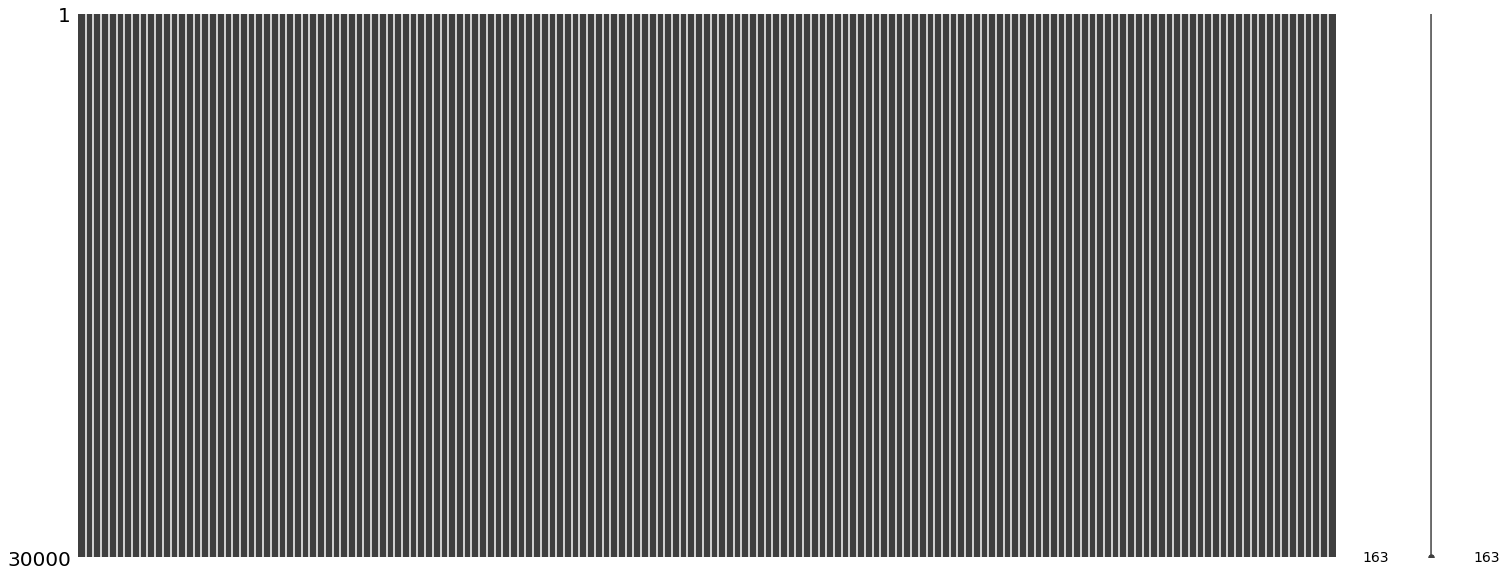

In [84]:
#Check for the missing vlaues again. 
missingno.matrix(churn_hvc)

In [85]:
churn_hvc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 99998
Data columns (total 163 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   arpu_6                    float64
 2   arpu_7                    float64
 3   arpu_8                    float64
 4   onnet_mou_6               float64
 5   onnet_mou_7               float64
 6   onnet_mou_8               float64
 7   offnet_mou_6              float64
 8   offnet_mou_7              float64
 9   offnet_mou_8              float64
 10  roam_ic_mou_6             float64
 11  roam_ic_mou_7             float64
 12  roam_ic_mou_8             float64
 13  roam_og_mou_6             float64
 14  roam_og_mou_7             float64
 15  roam_og_mou_8             float64
 16  loc_og_t2t_mou_6          float64
 17  loc_og_t2t_mou_7          float64
 18  loc_og_t2t_mou_8          float64
 19  loc_og_t2m_mou_6          float64
 20  loc_og_t2m_mou_7          f

## IV. Model Building & Evaluation
### In this step we will create two models. One for high accuracy and other for the interpretability.

###### Objective I: Accuracy Model
1. Remove outliers.
2. Split data into train and test.
3. Standardized data.
4. Reduce the number of variables using PCA.
5. Handle target class imbalance using Random Forest class_weight=balanced
6. Train Random Forest model to get good accuracy using hyperparameter tuning.

###### Objective II: Interpretable Model
1. Do random over-sampling to handle class imbalance
2. Hyperparameter tuning for Random Forest
3. Identify Important Features Using Random Forest
4. Build Logistic Regression Model
5. Analyze confusion matrix

## Objective I: Building Accuracy Model With PCA

#### Remove outliers from the dataset which we identified in EDA & Splitting the data into Train & Test subsets. 

In [86]:
q1 = churn_hvc.quantile(0.05)
q3 = churn_hvc.quantile(0.95)
iqr = q3 - q1
fence_low = q1 - 1.5 * iqr
fence_high = q3 + 1.5 * iqr
df = churn_hvc[~((churn_hvc < fence_low) | (churn_hvc > fence_high)).any(axis=1)]

In [87]:
df.target.value_counts()

0    13863
1     1398
Name: target, dtype: int64

In [88]:
df.shape

(15261, 163)

#### Let’s find out once again if any features which may not be relevant due to having no variation present in data. We will delete those features.

In [89]:
uniques = df.apply(lambda x: x.nunique())
uniques
del_cols = uniques[uniques == 1]
del_cols.index.values

array(['isd_og_mou_8', 'og_others_7', 'og_others_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8'], dtype=object)

In [90]:
df = df.drop(['isd_og_mou_8', 'og_others_7', 'og_others_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8'], axis=1)

### Train-Test Split

In [91]:
# Split it back into X and y df's
y = df['target']
X = df.drop(['target'], axis=1)
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [92]:
# Shapes of X and y
print(X.shape)
print(y.shape)
# Shapes of X_train and y_train
print(X_train.shape)
print(y_train.shape)
# Shapes of X_testand y_test
print(X_test.shape)
print(y_test.shape)

(15261, 156)
(15261,)
(10682, 156)
(10682,)
(4579, 156)
(4579,)


### Let’s do feature standardization as the feature values are not in same scale.

In [93]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_amt_6,total_rech_amt_data_7,total_amt_7,total_rech_amt_data_8,total_amt_8,day_of_month_last_rech_6,day_of_month_last_rech_7,day_of_month_last_rech_8
0,0.999239,0.182330,0.129645,0.133711,0.000274,0.000000,0.004021,0.004287,0.005428,0.006107,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000591,0.000000,0.007706,0.005370,0.001130,0.003840,0.000000,0.000000,0.111514,0.077341,0.245372,0.000000,0.004449,0.000768,0.009974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.027563,0.087796,0.012303,0.000000,0.003565,0.003669,0.006658,0.013011,0.059826,0.004512,0.032037,0.031301,0.018223,0.000000,0.003142,0.040320,0.031401,0.046325,0.021116,0.000000,0.000000,0.000000,0.000000,0.002876,0.000000,0.000000,0.000000,0.294412,0.000000,0.002040,0.025709,0.031130,0.046075,0.026434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057692,0.037037,0.04,0.140150,0.113710,0.110015,0.205333,0.318987,0.250633,0.248788,0.048465,0.350442,0.1250,0.058824,0.125,0.304950,0.499010,0.392079,0.133333,0.000000,0.125,0.00,0.25,0.0,0.317526,0.262500,0.201627,0.163913,0.483149,0.358077,0.000000,0.153106,0.091149,0.030893,0.221483,0.030749,0.033642,0.284087,0.015522,1.0,0.0,0.5,0.000000,0.000000,0.0625,0.0,0.5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.011202,0.026500,0.183654,0.00000,0.000000,0.119938,0.165018,0.041888,0.082255,0.079289,0.094974,0.965517,0.766667,0.533333
1,0.600678,0.245669,0.065396,0.095844,0.065920,0.010115,0.029591,0.110614,0.039178,0.067679,0.000000,0.0,0.0,0.000000,0.0,0.0,0.142256,0.020763,0.056711,0.168248,0.042440,0.101802,0.104647,0.180011,0.059286,0.000000,0.000000,0.000000,0.195665,0.043155,0.097802,0.000000,0.000000,0.000000,0.000123,0.000000,0.001472,0.000000,0.0,0.0,0.000073,0.000000,0.000937,0.0,0.0,0.121696,0.000000,0.000000,0.106129,0.125369,0.032349,0.062282,0.108945,0.152191,0.051675,0.215283,0.130276,0

In [94]:
X_test.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_amt_6,total_rech_amt_data_7,total_amt_7,total_rech_amt_data_8,total_amt_8,day_of_month_last_rech_6,day_of_month_last_rech_7,day_of_month_last_rech_8
0,0.027885,0.111289,0.034423,0.082136,0.00000,0.000171,0.002518,0.000000,0.000661,0.010613,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000352,0.004825,0.000000,0.000877,0.005359,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000729,0.005778,0.000000,0.000000,0.000000,0.000000,0.000000,0.008297,0.0,0.0,0.0,0.000000,0.000000,0.005278,0.0,0.0,0.000000,0.0,0.036148,0.0,0.000000,0.000546,0.008734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000626,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.076923,0.018519,0.00,0.120758,0.000000,0.000000,0.205333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.0000,0.304950,0.000000,0.000000,0.066667,0.000000,0.0000,0.00,0.0,0.00,0.158763,0.000000,0.000000,0.042243,0.000000,0.000000,0.000000,0.000000,0.000000,0.030893,0.015332,0.028005,0.102018,0.014054,0.015522,0.5,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.011949,0.000000,0.000000,0.000000,0.0,0.029984,0.075618,0.000000,0.000000,0.000000,0.000000,0.655172,0.633333,1.000000
1,0.278243,0.114781,0.032198,0.111070,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000931,0.001891,0.004154,0.012953,0.000000,0.000000,0.042773,0.001554,0.003210,0.015856,0.000000,0.000000,

### Reduce the number of variables using PCA.

In [95]:
pca = PCA(random_state=100)

In [96]:
pca.fit(X_train)

PCA(random_state=100)

In [97]:
pca.components_

array([[ 8.40211842e-03,  1.22776993e-02,  2.07725196e-02, ...,
        -2.73179079e-02, -1.04247701e-04, -7.50904927e-03],
       [ 1.05107827e-01,  1.35945899e-01,  1.09480904e-01, ...,
         1.82394534e-02,  3.19621952e-02,  2.85053498e-04],
       [ 2.00078506e-02,  2.36449346e-02,  6.12896073e-02, ...,
         1.57117234e-01,  1.71858766e-01,  1.38450810e-01],
       ...,
       [-0.00000000e+00,  1.61490608e-16, -1.83243682e-16, ...,
         1.06840225e-18, -8.22200492e-18, -6.37220682e-18],
       [-0.00000000e+00,  2.28872252e-18, -3.46812558e-16, ...,
        -3.85021536e-17, -1.37790043e-17,  2.25302012e-17],
       [-0.00000000e+00,  3.19031648e-16,  1.06157298e-16, ...,
         2.86116811e-17, -3.28524402e-17,  1.90219917e-17]])

In [98]:
pca.explained_variance_ratio_

array([1.51022733e-01, 9.17554814e-02, 8.71138992e-02, 7.43352738e-02,
       5.58311779e-02, 4.39432592e-02, 3.33427823e-02, 2.71844259e-02,
       2.14804226e-02, 1.84953759e-02, 1.58385491e-02, 1.52206003e-02,
       1.43660362e-02, 1.40746312e-02, 1.36518194e-02, 1.25380261e-02,
       1.23710911e-02, 1.19370556e-02, 1.17837693e-02, 1.08303649e-02,
       1.00191947e-02, 9.48875929e-03, 9.26856759e-03, 8.93271508e-03,
       8.80101336e-03, 8.27717565e-03, 7.87716749e-03, 7.69879063e-03,
       7.46740183e-03, 7.01063708e-03, 6.53968236e-03, 6.28928684e-03,
       5.88948958e-03, 5.56560468e-03, 5.30702879e-03, 5.22422907e-03,
       5.12246627e-03, 4.92301423e-03, 4.62445440e-03, 4.54785877e-03,
       4.43965206e-03, 4.19039289e-03, 3.88270369e-03, 3.77616837e-03,
       3.71401738e-03, 3.57528272e-03, 3.48776434e-03, 3.38660633e-03,
       3.35161205e-03, 3.27184058e-03, 3.17332961e-03, 3.09963203e-03,
       2.94678604e-03, 2.84853715e-03, 2.77937095e-03, 2.67727005e-03,
      

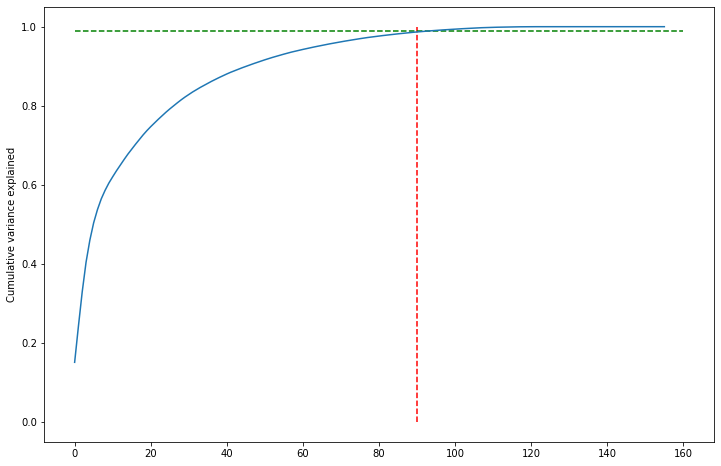

In [99]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=90, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.99, xmax=160, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Unsupervised PCA

In [100]:
final_pca = PCA(.90)

In [101]:
df_train_pca = final_pca.fit_transform(X_train)

In [102]:
df_train_pca.shape

(10682, 47)

###### From above output we can clearly see that PCA has reduced features to 10 principle components. Let’s plot correlation matrix an verify if multicollinearity exist into the selected 15 PCA components.

<AxesSubplot:>

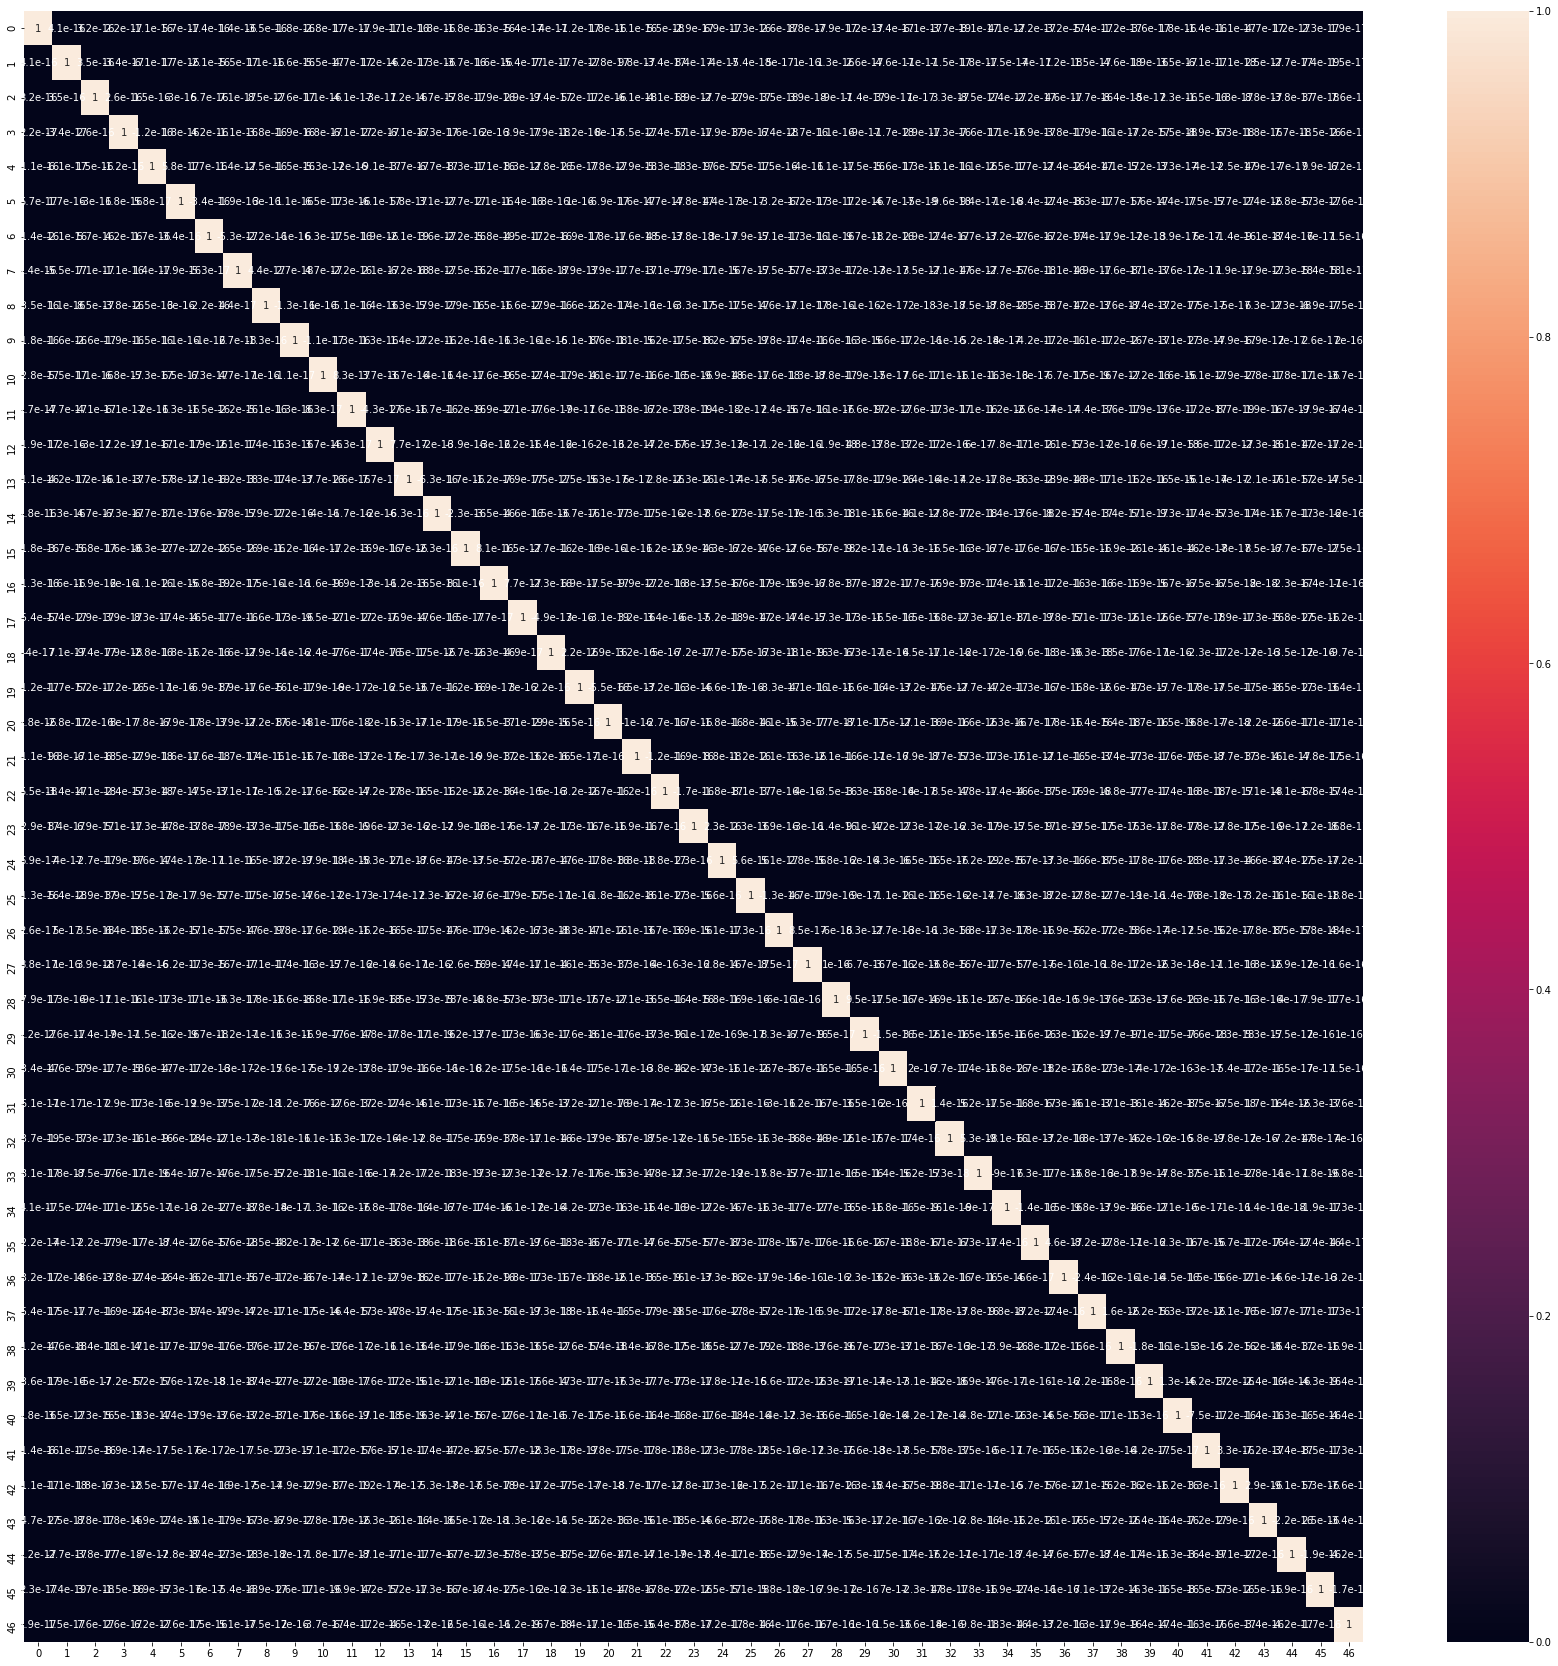

In [103]:
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=(30,30))
sns.heatmap(corrmat, annot=True)

#### WOW!!!! PCA did its job we do not see any multicollinearity between the selected PCA components.

#### It has come up with 46 Principal cmponents.

###### Lets apply PCA on test data

In [104]:
#Transform PCA on test data
df_test_pca = final_pca.transform(X_test)
df_test_pca.shape

(4579, 47)

## Building Random Forest with Principal components.
### Recall from our data preparation step we found that high value customer dataset has high imbalance in target variable.

#### Finding Churn Rate

In [105]:
#churn = (sum(standardized_df['target'])/len(standardized_df['target'].index))*100
churn = (sum(y_train)/len(y_train.index))*100
round(churn,2)

9.28

In [106]:
y_train.value_counts()

0    9691
1     991
Name: target, dtype: int64

In [107]:
y_train.shape

(10682,)

## We can see that we have 9.28% churn rate it is imbalanced class. So, before proceeding further let’s balance the class using class weights technique in Random Forest Classifier. 
### When using RandomForestClassifier a useful setting is class_weight=balanced wherein classes are automatically weighted inversely proportional to how frequently they appear in the data.

***Specifically:***

wj=n_samples / (n_classes * n_samplesj)

Here,

    wj is the weight for each class(j signifies the class)
    n_samples is the total number of samples or rows in the dataset
    n_classes is the total number of unique classes in the target
    n_samplesj is the total number of rows of the respective class

For our telecom churn example:

n_samples=  21000,  n_classes= 2(0&1), n_sample0= 9691, n_samples1= 991

Weights for class 0:

w0=  10682/(2*9691) = 0.551

Weights for class 1:

w1= 10682/(2*991) = 5.389

So, in out case minority class is 1 & majority class is 0

In [108]:
learner_pca_rclf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")
model_pca_rclf = learner_pca_rclf.fit(df_train_pca, y_train)

## Lets make prediction on test data and check the accuracy of model.

In [109]:
pred_test = model_pca_rclf.predict(df_test_pca)
pred_probs_test = model_pca_rclf.predict_proba(df_test_pca)

In [110]:
#Confusion matrix ....for test data
confusion = metrics.confusion_matrix(y_test, pred_test)
print(confusion)

[[4147   25]
 [ 373   34]]


In [111]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

### From above we can see 88% accuracy on test dataset without hyperparameter tuning. Let’s tune the hyperparameter and do the test again

In [112]:
### Hyper-parameter tuning for the Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [113]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [114]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   47.9s finished


CPU times: user 6.59 s, sys: 331 ms, total: 6.92 s
Wall time: 48.7 s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [115]:
grid_search.best_score_

0.9089125886726205

In [116]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, n_jobs=-1, random_state=42)

## Let's use grid_search hyperparameters and re-build the model and test 

In [117]:
model_pca_rclf = rf_best.fit(df_train_pca, y_train)

## Let's make prediction on test data and check the accuracy of model.

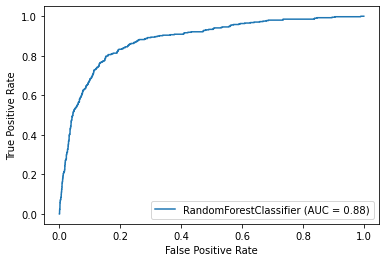

In [118]:
plot_roc_curve(model_pca_rclf, df_test_pca, y_test)
plt.show()

In [119]:
pred_probs_test = model_pca_rclf.predict_proba(df_test_pca)
pred_test = model_pca_rclf.predict(df_test_pca)

In [120]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

In [121]:
#Confusion matrix ....for test data
confusion = metrics.confusion_matrix(y_test, pred_test)
print(confusion)

[[4034  138]
 [ 244  163]]


### From above we can see 88% accuracy on test dataset with hyperparameter tuning. 

## Objective II: Interpretable Model Without PCA

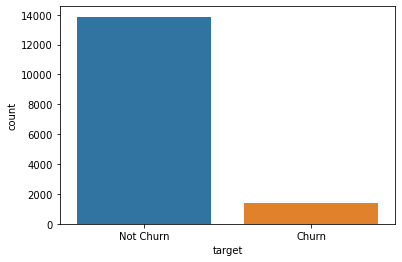

In [122]:
#Lets check the class imbalnce
grp = sns.countplot(df['target'])
grp.set_xticklabels(['Not Churn', 'Churn'])
plt.show()

## Let’s do random over-sampling with imblearn to handle class imbalance this time. 
### There are several other techniques to handle class imbalance, but I preferred over-sampling due to below advantages.
1. Unlike under-sampling, this method leads to no information loss.
2. Outperforms under sampling

In [123]:
# import library
from imblearn.over_sampling import RandomOverSampler
y = df['target']
X = df.drop(['target'], axis=1)

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 13863, 1: 1398})
Resample dataset shape Counter({1: 13863, 0: 13863})


In [124]:
x_ros.shape

(27726, 156)

In [125]:
y_ros.value_counts()

1    13863
0    13863
Name: target, dtype: int64

#### Let’s use the Hyperparametric tuned Random Forest Classifier and identify the top 10 important features. We will use those features and build the Logistic Regression model for classification.

In [126]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, train_size=0.7, test_size=0.3, random_state=100)

### Hyper-parameter tuning for the Random Forest

In [127]:
### Hyper-parameter tuning for the Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
}

In [128]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [129]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   38.5s finished


CPU times: user 9.94 s, sys: 186 ms, total: 10.1 s
Wall time: 39.7 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [130]:
grid_search.best_score_

0.968878812860676

In [131]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [132]:
model_rf = rf_best.fit(X_train,y_train)

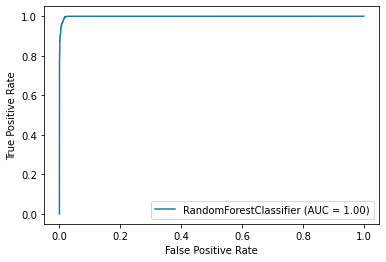

In [133]:
plot_roc_curve(model_rf, X_train, y_train)
plt.show()

In [134]:
model_rf.feature_importances_

array([5.78975786e-03, 4.92470714e-03, 5.76418282e-03, 2.19623469e-02,
       3.33633316e-03, 3.27906085e-03, 7.89452978e-03, 3.62229345e-03,
       3.68318380e-03, 2.21721484e-02, 1.33421708e-03, 1.31179157e-03,
       6.87178913e-03, 1.20820921e-03, 1.26792636e-03, 1.04254340e-02,
       2.32961014e-03, 3.60456949e-03, 1.62576875e-02, 3.75280771e-03,
       4.37797894e-03, 1.77293081e-02, 1.77608117e-03, 1.24039199e-03,
       1.88132400e-03, 1.11724286e-03, 1.65090964e-03, 2.34950117e-03,
       3.56260060e-03, 4.32983139e-03, 2.51945880e-02, 2.35523800e-03,
       1.86246259e-03, 1.41423126e-03, 2.02774507e-03, 3.08945685e-03,
       2.22398679e-03, 5.10689418e-04, 5.46254059e-04, 4.47776972e-04,
       3.24491527e-03, 3.15712426e-03, 2.54753143e-03, 5.30573637e-05,
       0.00000000e+00, 2.74613400e-03, 3.86503055e-03, 3.94437738e-03,
       1.08118143e-03, 4.65952163e-03, 5.54726848e-03, 1.60072788e-02,
       4.01063081e-03, 4.78780849e-03, 5.23465551e-02, 6.92977747e-03,
      

In [135]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": model_rf.feature_importances_
})

In [136]:
# display top 15 rows
imp_cols = imp_df.sort_values(by="Imp", ascending=False).head(15)
imp_cols

,Varname,Imp
63,loc_ic_mou_8,0.093482
57,loc_ic_t2m_mou_8,0.063563
78,total_ic_mou_8,0.055044
54,loc_ic_t2t_mou_8,0.052347
93,total_rech_amt_8,0.037509
99,last_day_rch_amt_8,0.036573
30,loc_og_mou_8,0.025195
96,max_rech_amt_8,0.023991
9,offnet_mou_8,0.022172
3,arpu_8,0.021962


### Now that we have the 15 most critical features, let us use them in a LR model

In [137]:
imp_cols_ = list(imp_cols.Varname.values)
imp_cols_.append('target')
imp_cols_

['loc_ic_mou_8',
 'loc_ic_t2m_mou_8',
 'total_ic_mou_8',
 'loc_ic_t2t_mou_8',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'loc_og_mou_8',
 'max_rech_amt_8',
 'offnet_mou_8',
 'arpu_8',
 'fb_user_8',
 'av_rech_amt_data_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2t_mou_8',
 'total_og_mou_8',
 'target']

In [138]:
### Make a df only of the fifteen(15) critical features RF identified.
# Split it back into X and y df's
df_ = df[imp_cols_]
y = df_.pop('target')
X = df_
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.head()

,loc_ic_mou_8,loc_ic_t2m_mou_8,total_ic_mou_8,loc_ic_t2t_mou_8,total_rech_amt_8,last_day_rch_amt_8,loc_og_mou_8,max_rech_amt_8,offnet_mou_8,arpu_8,fb_user_8,av_rech_amt_data_8,loc_og_t2m_mou_8,loc_og_t2t_mou_8,total_og_mou_8
14960,27.98,19.33,35.04,2.23,223,198,13.43,198,9.23,210.250,1.0,223.0,3.69,4.20,14.24
30714,190.76,126.08,203.64,25.54,150,0,131.69,100,102.29,138.481,0.0,0.0,97.83,30.91,133.21
13712,112.01,106.94,116.86,2.60,789,0,115.98,144,264.93,700.633,1.0,102.0,107.66,8.31,1070.34
84214,13.13,5.01,19.06,8.11,130,10,6.21,30,20.58,130.112,0.0,0.0,4.98,1.23,81.38
46729,494.48,154.66,494.48,275.21,303,130,99.56,150,56.51,220.206,0.0,0.0,51.66,43.04,101.04


#### Feature Scaling

In [139]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_train.head()

,loc_ic_mou_8,loc_ic_t2m_mou_8,total_ic_mou_8,loc_ic_t2t_mou_8,total_rech_amt_8,last_day_rch_amt_8,loc_og_mou_8,max_rech_amt_8,offnet_mou_8,arpu_8,fb_user_8,av_rech_amt_data_8,loc_og_t2m_mou_8,loc_og_t2t_mou_8,total_og_mou_8
14960,0.021116,0.018223,0.026434,0.004512,0.110015,0.350442,0.009974,0.250633,0.006107,0.133711,1.0,0.201627,0.003840,0.007706,0.006658
30714,0.143960,0.118858,0.153626,0.051675,0.074001,0.000000,0.097802,0.126582,0.067679,0.095844,0.0,0.000000,0.101802,0.056711,0.062282
13712,0.084530,0.100815,0.088159,0.005261,0.389245,0.000000,0.086135,0.182278,0.175289,0.392451,1.0,0.092224,0.112031,0.015247,0.500432
84214,0.009909,0.004723,0.014379,0.016409,0.064134,0.017699,0.004612,0.037975,0.013617,0.091428,0.0,0.000000,0.005182,0.002257,0.038049
46729,0.373167,0.145801,0.373035,0.556835,0.149482,0.230088,0.073940,0.189873,0.037389,0.138964,0.0,0.000000,0.053758,0.078967,0.047241


In [140]:
X_test.head()

,loc_ic_mou_8,loc_ic_t2m_mou_8,total_ic_mou_8,loc_ic_t2t_mou_8,total_rech_amt_8,last_day_rch_amt_8,loc_og_mou_8,max_rech_amt_8,offnet_mou_8,arpu_8,fb_user_8,av_rech_amt_data_8,loc_og_t2m_mou_8,loc_og_t2t_mou_8,total_og_mou_8
9627,0.000626,0.000782,0.000626,0.000000,0.000000,0.000000,0.005778,0.000000,0.010613,0.082136,0.0,0.000000,0.005359,0.004825,0.008734
89753,0.015856,0.012953,0.015850,0.000931,0.097681,0.000000,0.000000,0.250633,0.000000,0.111070,1.0,0.179024,0.000000,0.000000,0.000000
56585,0.058207,0.070666,0.062887,0.004370,0.071534,0.256637,0.063818,0.183544,0.086894,0.183580,1.0,0.131103,0.081625,0.007816,0.067813
74025,0.441449,0.410442,0.463887,0.213115,0.333004,0.309735,0.302260,0.221519,0.227797,0.349203,1.0,0.158228,0.301682,0.162612,0.203560
68349,0.025440,0.028432,0.127561,0.005544,0.123335,0.030088,0.006394,0.063291,0.017950,0.142389,1.0,0.117541,0.006129,0.004972,0.034290


In [141]:
# Logistic regression model
X_train_lr = sm.add_constant(X_train)
logml = sm.GLM(y_train,X_train_lr, family = sm.families.Binomial())
res = logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                10682
Model:                            GLM   Df Residuals:                    10666
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2272.0
Date:                Sun, 30 May 2021   Deviance:                       4544.0
Time:                        13:18:25   Pearson chi2:                 9.24e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2560      0.076     -3.346      0.001      -0.406      -0.106
loc_ic_mou_8         -17.3861     11.845     -1.468      0.142     -40.602       5.830
loc_ic_t2m_mou_8       5.4191      9.539      0.568      0.570     -13.278      24.116
total_ic_mou_8       -14.3410      3.839     -3.735      0.000     -21.866      -6.816
loc_ic_t2t_mou_8       5.4140      4.569      1.185      0.236      -3.541      14.369
total_rech_amt_8      -4.0801      1.939     -2.104      0.035      -7.880      -0.280
last_day_rch_amt_8    -1.5805      0.536     -2.946      0.003      -2.632      -0.529
loc_og_mou_8         -57.8760     31.058     -1.863      0.062    -118.749       2.997
max_rech_amt_8         0.1993      0.757      0.263      0.792      -1.284       1.683
offnet_mou_8           1.6243      1.288      1.261      0.207      -0.900       4.149
arpu_8                 2.6776      2.049      1.307      0.191      -1.338       6.694
fb_user_8             -1.7308      0.146    -11.893      0.000      -2.016      -1.446
av_rech_amt_data_8    -0.5034      0.863     -0.584      0.560      -2.194       1.187
loc_og_t2m_mou_8      40.8386     22.389      1.824      0.068      -3.043      84.720
loc_og_t2t_mou_8      21.4456     12.788      1.677      0.094      -3.618      46.509
total_og_mou_8        -2.9368      1.481     -1.983      0.047      -5.839      -0.034
======================================================================================
"""

<AxesSubplot:>

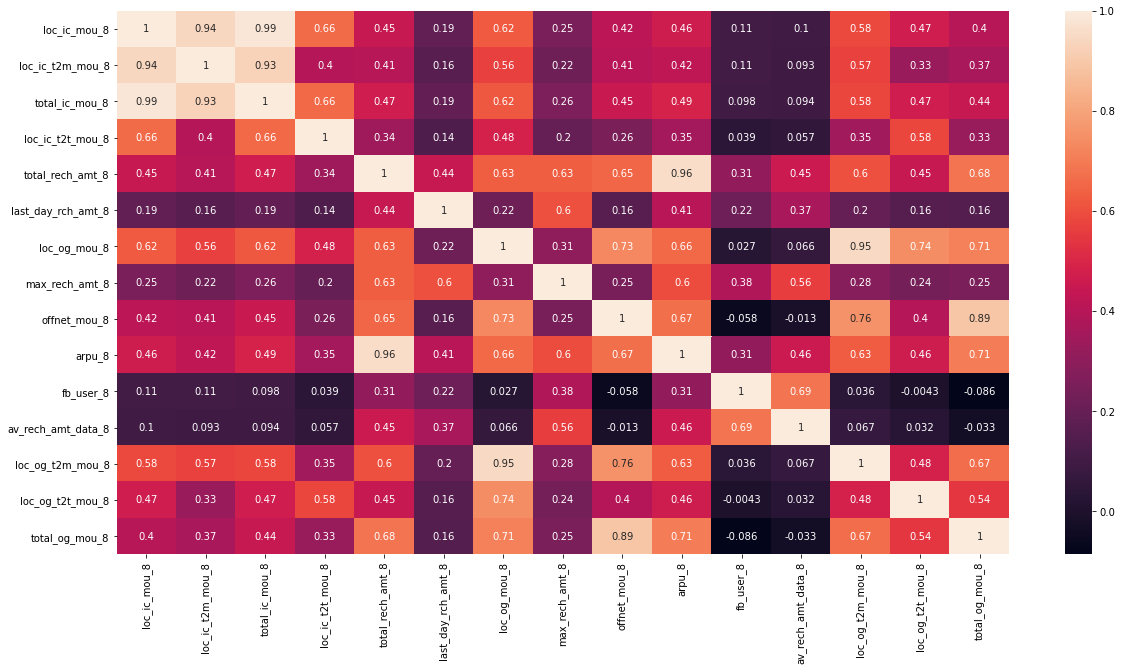

In [142]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)

##### Dropping five (5) highly correated columns

In [143]:
X_train = X_train.drop(['loc_ic_t2m_mou_8','total_ic_mou_8', 'arpu_8', 'loc_og_t2m_mou_8', 'offnet_mou_8'], axis=1)
X_test = X_test.drop(['loc_ic_t2m_mou_8','total_ic_mou_8', 'arpu_8', 'loc_og_t2m_mou_8', 'offnet_mou_8'], axis=1)

In [144]:
# Logistic regression model
X_train_lr = sm.add_constant(X_train)
logml = sm.GLM(y_train,X_train_lr, family = sm.families.Binomial())
res = logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                10682
Model:                            GLM   Df Residuals:                    10671
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2284.6
Date:                Sun, 30 May 2021   Deviance:                       4569.3
Time:                        13:18:27   Pearson chi2:                 3.58e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2086      0.053     -3.945      0.000      -0.312      -0.105
loc_ic_mou_8         -26.9143      2.309    -11.655      0.000     -31.440     -22.388
loc_ic_t2t_mou_8       3.0421      2.137      1.424      0.155      -1.146       7.230
total_rech_amt_8      -2.2711      1.299     -1.749      0.080      -4.817       0.275
last_day_rch_amt_8    -1.6103      0.535     -3.011      0.003      -2.659      -0.562
loc_og_mou_8           0.2873      1.860      0.154      0.877      -3.358       3.932
max_rech_amt_8        -0.0274      0.752     -0.036      0.971      -1.501       1.446
fb_user_8             -1.7071      0.145    -11.777      0.000      -1.991      -1.423
av_rech_amt_data_8    -0.1703      0.830     -0.205      0.837      -1.796       1.456
loc_og_t2t_mou_8      -2.2752      1.920     -1.185      0.236      -6.038       1.488
total_og_mou_8        -2.0886      0.985     -2.121      0.034      -4.019      -0.158
======================================================================================
"""

In [145]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_lr)
y_train_pred

14960    0.033759
30714    0.013016
13712    0.002162
84214    0.335413
46729    0.000073
           ...   
79474    0.420658
52373    0.010973
92407    0.000525
44985    0.000308
36804    0.014385
Length: 10682, dtype: float64

In [146]:
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
14960,0,0.033759,14960
30714,0,0.013016,30714
13712,0,0.002162,13712
84214,0,0.335413,84214
46729,0,0.000073,46729


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [147]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
14960,0,0.033759,14960,0
30714,0,0.013016,30714,0
13712,0,0.002162,13712,0
84214,0,0.335413,84214,0
46729,0,0.000073,46729,0


In [148]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[9691    0]
 [ 991    0]]


In [149]:
# Let's check the overall accuracy.
print(round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted),2))

0.91


## Metrics beyond simply accuracy

In [150]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [151]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.0

In [152]:
# Let us calculate specificity
TN / float(TN+FP)

1.0

In [153]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0


In [154]:
# positive predictive value 
print (TP / float(TP+FP))

nan


In [155]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9072271110278974


#### Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [156]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [157]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

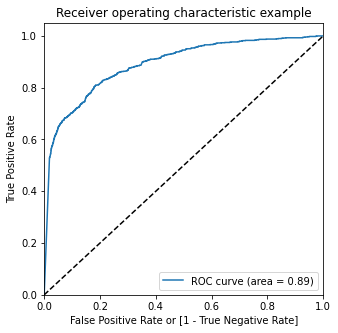

In [158]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [159]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
14960,0,0.033759,14960,0,1,0,0,0,0,0,0,0,0,0
30714,0,0.013016,30714,0,1,0,0,0,0,0,0,0,0,0
13712,0,0.002162,13712,0,1,0,0,0,0,0,0,0,0,0
84214,0,0.335413,84214,0,1,1,1,1,0,0,0,0,0,0
46729,0,0.000073,46729,0,1,0,0,0,0,0,0,0,0,0


In [160]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.092773  1.000000  0.000000
0.1   0.1  0.813237  0.810293  0.813538
0.2   0.2  0.871840  0.717457  0.887628
0.3   0.3  0.902640  0.684157  0.924982
0.4   0.4  0.926418  0.621594  0.957590
0.5   0.5  0.907227  0.000000  1.000000
0.6   0.6  0.907227  0.000000  1.000000
0.7   0.7  0.907227  0.000000  1.000000
0.8   0.8  0.907227  0.000000  1.000000
0.9   0.9  0.907227  0.000000  1.000000


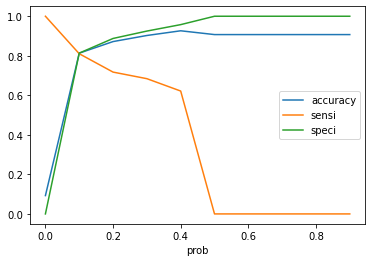

In [161]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [162]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
14960,0,0.033759,14960,0,1,0,0,0,0,0,0,0,0,0,0
30714,0,0.013016,30714,0,1,0,0,0,0,0,0,0,0,0,0
13712,0,0.002162,13712,0,1,0,0,0,0,0,0,0,0,0,0
84214,0,0.335413,84214,0,1,1,1,1,0,0,0,0,0,0,1
46729,0,0.000073,46729,0,1,0,0,0,0,0,0,0,0,0,0


In [163]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8132372214941023

In [164]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[7884, 1807],
       [ 188,  803]])

In [165]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [166]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8102926337033299

In [167]:
# Let us calculate specificity
TN / float(TN+FP)

0.8135383345371995

In [168]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18646166546280055


In [169]:
# Positive predictive value 
print (TP / float(TP+FP))

0.30766283524904214


In [170]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9767096134786918


### Making predictions on the test set

In [171]:
# Create Xlr_test from X_test
print(X_test.shape)
print(y_test.shape)

(4579, 10)
(4579,)


In [172]:
# Let us predict the test set and check
X_test_lr = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_lr)

In [173]:
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

,Churn,Churn_Prob,CustID
9627,0,4.370903e-01,9627
89753,0,6.921904e-02,89753
56585,0,1.458424e-02,56585
74025,0,2.646076e-07,74025
68349,0,4.675813e-02,68349


In [174]:
# Reducing the threshold to 0.4 instead of 0.5
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.4 else 0)
# Let's see the head
y_test_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
9627,0,4.370903e-01,9627,1
89753,0,6.921904e-02,89753,0
56585,0,1.458424e-02,56585,0
74025,0,2.646076e-07,74025,0
68349,0,4.675813e-02,68349,0


In [175]:
# Look at ones (1)
y_test_pred_final[y_test_pred_final['Churn'] == 1]

,Churn,Churn_Prob,CustID,predicted
38594,1,0.384878,38594,0
36421,1,0.448048,36421,1
82351,1,0.448048,82351,1
26010,1,0.368551,26010,0
59209,1,0.448048,59209,1
...,...,...,...,...
76975,1,0.134751,76975,0
37657,1,0.448048,37657,1
20928,1,0.445193,20928,1
74907,1,0.448048,74907,1


In [176]:
# Confusion matrix ....for test data
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

[[4016  156]
 [ 156  251]]


In [177]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

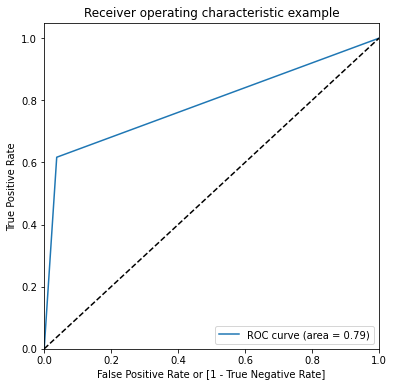

(array([0.        , 0.03739214, 1.        ]),
 array([0.        , 0.61670762, 1.        ]),
 array([2, 1, 0]))

In [178]:
draw_roc(y_test_pred_final.Churn, y_test_pred_final.predicted)

In [179]:
# Let's check the overall accuracy.
print(round(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted),2))

0.93


### We have got a 93% accuracy on the Logistic Regression model using ten (10) crucial features.

#### Conclusion: 
1. The nine crucial features identified by Random Forest without PCA are:
 - loc_ic_mou_8	
 - loc_ic_t2t_mou_8 
 - total_rech_amt_8	
 - last_day_rch_amt_8	
 - loc_og_mou_8	
 - max_rech_amt_8	
 - fb_user_8	
 - av_rech_amt_data_8	
 - loc_og_t2t_mou_8	
 - total_og_mou_8
       
2. All the above Ten(10) critical features belong to the 8th month, month of Aug, where the consumptions and usage drops until they churn. This makes sense and so these features are what predicts churn of the HVC (High Value Customers) with a 94% accuracy.

3. We can clearly explain the model (high interpretability) and it has a good accuracy of 94%

# V. Conclusion:
### Objective I: 
#### We got 88% accuracy in model using PCA with 46 principal components. 
### Objective II: 
#### We got 93% accuracy in Logistic Regression model with Random Forest identified Ten(10) important features what predicts churn of HVC. 
#### We also see 81% sensitivity which is pretty good and False Positive(FP) rate is 18%. 